In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from nltk.tokenize import word_tokenize
import statsmodels.api as sm
from statsmodels.formula.api import ols
from ISLP.models import (ModelSpec as MS,
                         summarize)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.manifold import TSNE
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

from ipywidgets import IntProgress
from IPython.display import display

# special matplotlib argument for improved plots
from matplotlib import rcParams

In [2]:
def regression_graph(y,x,df,title):

    # Set the aesthetic style of the plots
    sns.set(style="whitegrid")

    # Create a regression plot
    plt.figure(figsize=(10, 6))
    sns.regplot(y=y, x=x, data=df, fit_reg=True, 
                scatter_kws={'s': 50, 'alpha': 0.6, 'color': 'b'}, 
                line_kws={'color': 'red', 'linewidth': 2})

    # Customize the plot with titles and labels
    plt.title(title, fontsize=20)

    # Customize the ticks on the axes
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Show grid
    plt.grid(True, linestyle='--', alpha=0.7)

    # Show the plot
    plt.show()

# Import Data

In [6]:
df_model = pd.read_csv('../data/model_data.csv')
df_ndc = pd.read_csv('../data/ndc_files.csv')
#df_model_sent = pd.read_csv('../data/df_ndc_text_sent.csv')

In [49]:
df_model.head()

,Country,health_count,total_sentences,total_words,health_percent,population,sids,income,democracy,health_expenditure,...,health_topic,economy_topic,energy_topic,agri_topic,Other_1,Other_2,eu,eu_num,tsne-2d-one,tsne-2d-two
0,AFG,3,122,3964,0.075681,17.381746,0,6.304866,3.083333,10.961983,...,0.193022,0.179496,0.188787,0.206940,0.119446,0.112311,Non-EU,1,0.220515,-10.469626
1,ALB,0,32,1246,0.000000,14.871946,0,8.324605,8.083333,5.900000,...,0.035291,0.148707,0.553311,0.026290,0.159433,0.076969,Non-EU,1,0.322026,5.149451
2,AND,2,77,2766,0.072307,11.255410,0,10.524712,10.000000,10.324107,...,0.048727,0.082852,0.415458,0.039969,0.172799,0.240195,Non-EU,1,-3.598655,9.539011
3,ARE,1,75,2437,0.041034,16.052061,0,10.549067,1.333333,3.403416,...,0.209761,0.162986,0.336477,0.116617,0.083639,0.090520,Non-EU,1,5.569890,-9.543328
4,ARG,6,130,4878,0.123001,17.590347,0,9.456438,8.916666,7.544399,...,0.098628,0.120778,0.180449,0.078079,0.273736,0.248329,Non-EU,1,3.555674,4.463760


# Exploratory Data Analysis
* Table 1 
* Table 2
* Figure 1

In [48]:
df_model.describe()

,health_count,total_sentences,total_words,health_percent,population,sids,income,democracy,health_expenditure,coal_rents,...,HES_4,health_topic,economy_topic,energy_topic,agri_topic,Other_1,Other_2,eu_num,tsne-2d-one,tsne-2d-two
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,...,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,6.240000,138.731429,4741.737143,0.108310,15.540564,0.205714,8.598532,6.973173,6.827503,0.089427,...,0.182857,0.134640,0.164355,0.301446,0.124985,0.150934,0.123640,0.840000,0.322916,0.481912
std,8.510953,109.627907,3982.979930,0.129610,2.185184,0.405383,1.476368,2.940383,2.833060,0.401605,...,0.387659,0.075389,0.044547,0.175963,0.073759,0.053626,0.056373,0.367658,3.888957,6.911119
min,0.000000,18.000000,677.000000,0.000000,9.325899,0.000000,4.205596,0.000000,1.749096,0.000000,...,0.000000,0.019761,0.068183,0.078351,0.016359,0.068553,0.047651,0.000000,-7.536802,-11.474662
25%,0.000000,46.500000,1479.000000,0.000000,14.440855,0.000000,7.580041,5.208333,4.907672,0.000000,...,0.000000,0.072812,0.121373,0.165211,0.067003,0.119450,0.083776,1.000000,-2.613096,-5.752571
50%,3.000000,110.000000,3707.000000,0.071023,15.831739,0.000000,8.570339,7.833333,6.503357,0.000000,...,0.000000,0.134970,0.159489,0.247203,0.111223,0.134242,0.111451,1.000000,0.733187,-0.000051
75%,8.500000,189.000000,6204.000000,0.156850,17.015821,0.000000,9.666315,9.583334,8.289056,0.010683,...,0.000000,0.192245,0.196091,0.405968,0.156504,0.179506,0.151120,1.000000,2.978387,6.432521
max,43.000000,544.000000,21776.000000,0.958188,21.044382,1.000000,12.043058,10.000000,17.862183,4.361818,...,1.000000,0.312679,0.293514,0.700144,0.420958,0.455140,0.342110,1.000000,8.270335,13.912646


In [53]:
df_model.corr(numeric_only=True)

,health_count,total_sentences,total_words,health_percent,population,sids,income,democracy,health_expenditure,coal_rents,...,HES_4,health_topic,economy_topic,energy_topic,agri_topic,Other_1,Other_2,eu_num,tsne-2d-one,tsne-2d-two
health_count,1.000000,0.731693,0.714677,0.660092,0.094412,0.018923,-0.374533,-0.144462,-0.173117,-0.044047,...,0.744349,0.458395,0.167585,-0.505080,0.447342,0.123918,0.127927,0.320901,-0.378263,-0.360533
total_sentences,0.731693,1.000000,0.922788,0.271510,0.120518,0.063712,-0.476925,-0.113639,-0.247593,0.017571,...,0.506255,0.453888,0.222170,-0.617209,0.471163,0.245344,0.294145,0.422131,-0.567801,-0.460017
total_words,0.714677,0.922788,1.000000,0.215131,0.084937,0.040668,-0.481048,-0.110987,-0.208050,-0.011628,...,0.502085,0.380382,0.111537,-0.616259,0.564761,0.336908,0.267340,0.396563,-0.588551,-0.458311
health_percent,0.660092,0.271510,0.215131,1.000000,0.054374,0.072736,-0.297776,-0.180656,-0.171920,-0.023661,...,0.497939,0.535785,0.308147,-0.481869,0.342761,-0.016011,0.110850,0.365758,0.067365,-0.324222
population,0.094412,0.120518,0.084937,0.054374,1.000000,-0.611889,-0.183815,-0.285559,-0.091475,0.134648,...,0.034811,-0.131589,-0.185269,-0.011013,0.193134,0.120049,-0.010142,-0.069978,0.225365,-0.289621
sids,0.018923,0.063712,0.040668,0.072736,-0.611889,1.000000,-0.007053,0.211424,0.025484,-0.112340,...,0.051826,0.406075,0.477654,-0.216468,-0.103462,-0.217741,0.097682,0.222108,-0.213049,0.175424
income,-0.374533,-0.476925,-0.481048,-0.297776,-0.183815,-0.007053,1.000000,0.424512,0.245102,-0.071623,...,-0.259499,-0.513115,-0.247513,0.720069,-0.663314,-0.262947,-0.247822,-0.461373,0.085696,0.629177
democracy,-0.144462,-0.113639,-0.110987,-0.180656,-0.285559,0.211424,0.424512,1.000000,0.367748,0.045630,...,-0.094868,-0.303429,-0.269075,0.465110,-0.377091,-0.078255,-0.265560,-0.408469,-0.321290,0.799579
health_expenditure,-0.173117,-0.247593,-0.208050,-0.171920,-0.091475,0.025484,0.245102,0.367748,1.000000,-0.075621,...,-0.004365,-0.280246,-0.221672,0.373706,-0.329856,-0.029430,-0.156960,-0.234739,0.169655,0.573384
coal_rents,-0.044047,0.017571,-0.011628,-0.023661,0.134648,-0.112340,-0.071623,0.045630,-0.075621,1.000000,...,-0.073169,0.091515,0.018241,-0.032700,0.021171,-0.056822,-0.008377,0.074830,0.280254,0.036396


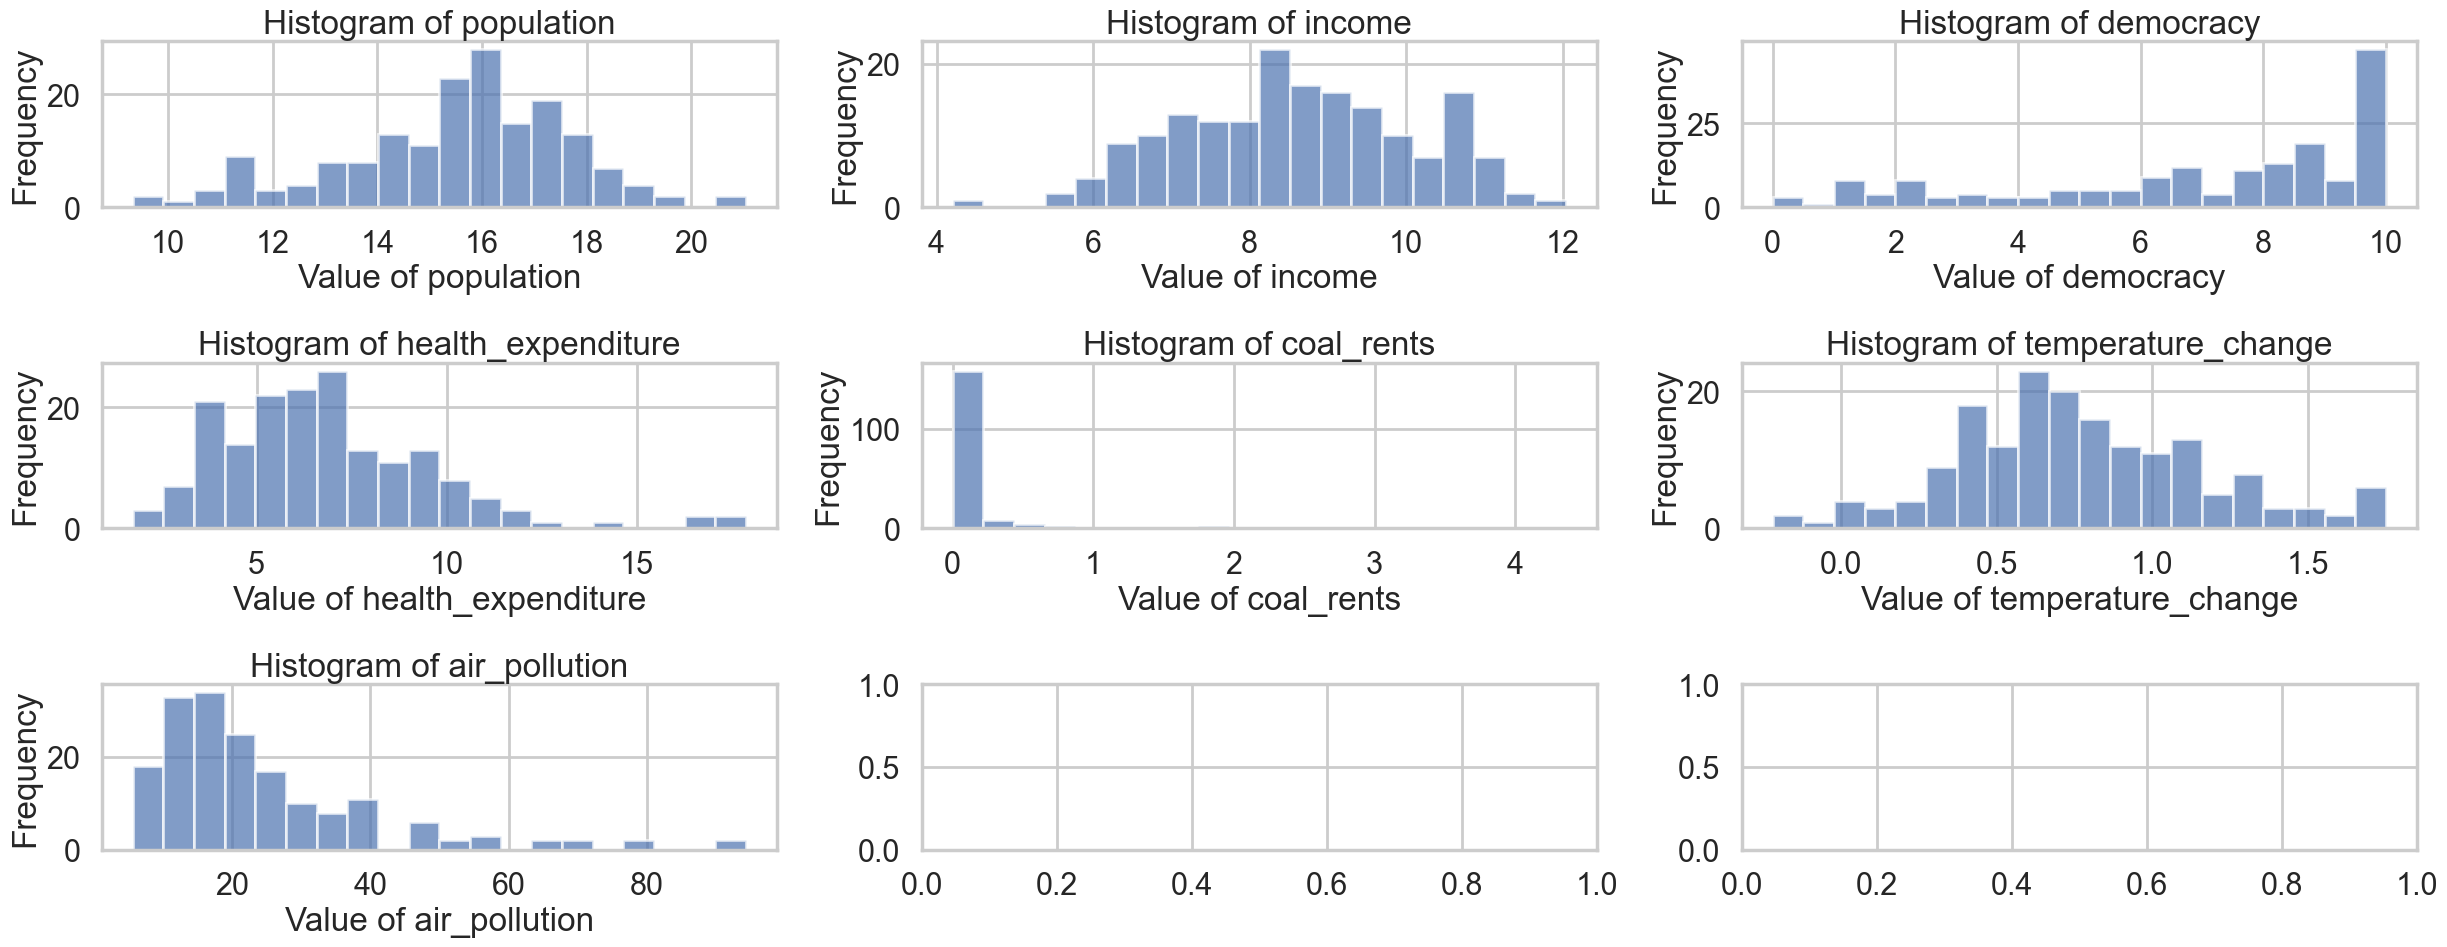

In [19]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 10), squeeze=False)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot histograms and set titles and labels
for i, col in enumerate(df_model[['population', 'income', 'democracy', 'health_expenditure',
       'coal_rents', 'temperature_change', 'air_pollution']].columns):
    df_model[col].plot.hist(ax=axes[i], alpha=0.7, bins=20)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(f'Value of {col}')
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

# Univariate Regression

In [20]:
m = ols('income ~ air_pollution',df_model).fit()
m.summary()

/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     27.66
Date:                Thu, 08 Aug 2024   Prob (F-statistic):           4.23e-07
Time:                        20:37:29   Log-Likelihood:                -303.01
No. Observations:                 175   AIC:                             610.0
Df Residuals:                     173   BIC:                             616.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         9.4055      0.185     50.750      0.000       9.040       9.771
air_pollution    -0.0332      0.006     -5.259      0.000      -0.046      -0.021
==============================================================================
Omnibus:                        1.500   Durbin-Watson:                   1.715
Prob(Omnibus):                  0.472   Jarque-Bera (JB):                1.156
Skew:                           0.051   Prob(JB):                        0.561
Kurtosis:                       3.385   Cond. No.                         52.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

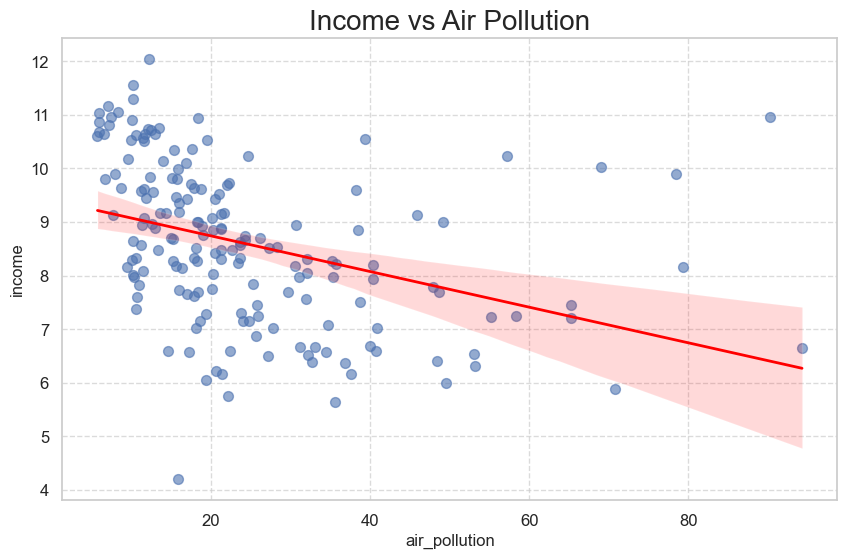

In [21]:
regression_graph('income','air_pollution',df_model,'Income vs Air Pollution')

# Run Additional Analysis:
* Air Pollution and Democracy
* Income and Democracy

In [ ]:
#m = ols('income ~ air_pollution',df_model).fit()
#m.summary()
#change the variables income and air_pollution

In [ ]:
#regression_graph('income','air_pollution',df_model,'Income vs Air Pollution')
#change the variables income and air_pollution and update the title

# Logistic Regression

In [22]:
allvars = df_model[['population', 'income','air_pollution']]
design = MS(allvars)
X = design.fit_transform(allvars).astype(float)
y = df_model.eu == 'EU'
glm = sm.GLM(y,
             X,
             family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,-13.4285,3.625,-3.705,0.000
population,0.2423,0.123,1.972,0.049
income,1.0149,0.272,3.728,0.000
air_pollution,-0.0804,0.040,-1.993,0.046


# T-SNE

/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

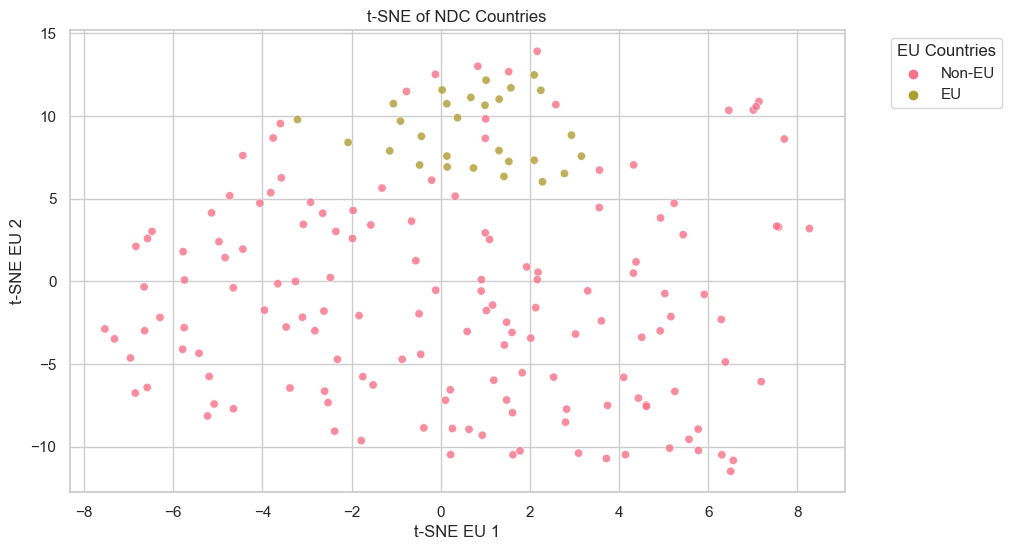

In [23]:
# Convert categorical variable 'decision' to numerical
le = LabelEncoder()
df_model['eu_num'] = le.fit_transform(df_model['eu'])
df_model = df_model.dropna()

# Features to be used in t-SNE
features = ['population', 'income', 'democracy', 'health_expenditure',
       'coal_rents', 'temperature_change', 'air_pollution','total_sentences', 'total_words',
       'health_percent' ]
X = df_model[features].dropna()

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Add t-SNE results to the DataFrame
df_model['tsne-2d-one'] = X_tsne[:, 0]
df_model['tsne-2d-two'] = X_tsne[:, 1]

# Define a custom color palette with 5 colors
custom_palette = sns.color_palette('husl', 5)

# Plot t-SNE results
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='tsne-2d-one', y='tsne-2d-two',
    hue='eu',
    palette=custom_palette,
    data=df_model,
    alpha=0.8
)
plt.title('t-SNE of NDC Countries')
plt.xlabel('t-SNE EU 1')
plt.ylabel('t-SNE EU 2')
plt.legend(title='EU Countries', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Deep Learning Sentiment Analysis

* https://huggingface.co/docs/transformers/en/model_doc/roberta

In [24]:
from transformers import pipeline
from transformers import AutoTokenizer

# Step 3: Load the pre-trained model and tokenizer
sentiment_analysis = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [31]:

# Define a function to split the text into chunks
def split_text_into_chunks(text, tokenizer, max_length):
    tokens = tokenizer.tokenize(text)
    chunks = []
    current_chunk = []
    current_length = 0

    for token in tokens:
        if current_length + len(token) > max_length:
            chunks.append(" ".join(current_chunk))
            current_chunk = []
            current_length = 0
        current_chunk.append(token)
        current_length += len(token)
    
    if current_chunk:
        chunks.append(" ".join(current_chunk))
    
    return chunks

# Define a function to perform sentiment analysis on the entire text
def analyze_sentiment(text, tokenizer, sentiment_analysis, max_length):
    chunks = split_text_into_chunks(text, tokenizer, max_length)
    results = []
    
    for chunk in chunks:
        result = sentiment_analysis(chunk)
        results.extend(result)
    
    return results

# Example usage
text = "Your long text goes here..."

# The max_length for the tokenizer
max_length = 300


def ave_sent(sent_results):
    
    l_sent = []
    for i, result in enumerate(sent_results):
        
        l_sent.append(result['score'])
    
    return sum(l_sent)/len(l_sent)

def get_sentiment_result(text):
    sentiment_results = analyze_sentiment(text, tokenizer, sentiment_analysis, max_length=200)
    ave_sent_result = ave_sent(sentiment_results)

    return ave_sent_result    

In [32]:
from tqdm.notebook import tqdm
tqdm.pandas()
df_ndc['sentiment'] = df_ndc['text'].progress_apply(get_sentiment_result)

  0%|          | 0/158 [00:00<?, ?it/s]

In [35]:
df_ndc.to_csv('df_ndc_text_sent')

array([[<Axes: title={'center': 'sentiment'}>]], dtype=object)

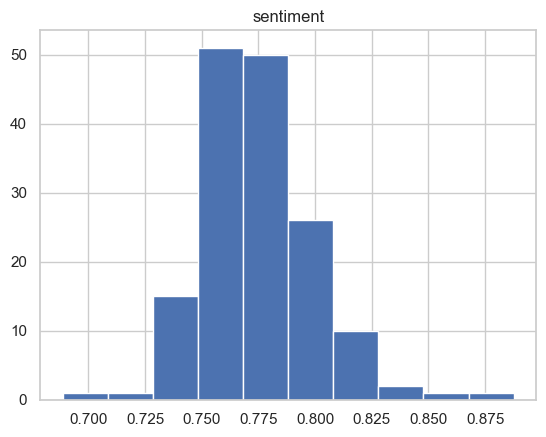

In [39]:
df_ndc.hist()

In [4]:
df_ndc_text_sent = pd.read_csv('df_ndc_text_sent.csv')

In [10]:
df_model_sent = pd.merge(df_model, df_ndc_text_sent, how = 'inner', left_on = 'Country', right_on='Country')

In [11]:
m = ols('income ~ sentiment',df_model_sent).fit()
m.summary()

/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.110
Date:                Sat, 17 Aug 2024   Prob (F-statistic):              0.148
Time:                        08:25:39   Log-Likelihood:                -258.50
No. Observations:                 148   AIC:                             521.0
Df Residuals:                     146   BIC:                             527.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.2216      3.383      3.908      0.000       6.536      19.907
sentiment     -6.3381      4.363     -1.453      0.148     -14.962       2.285
==============================================================================
Omnibus:                        1.315   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.518   Jarque-Bera (JB):                1.299
Skew:                           0.223   Prob(JB):                        0.522
Kurtosis:                       2.893   Cond. No.                         60.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

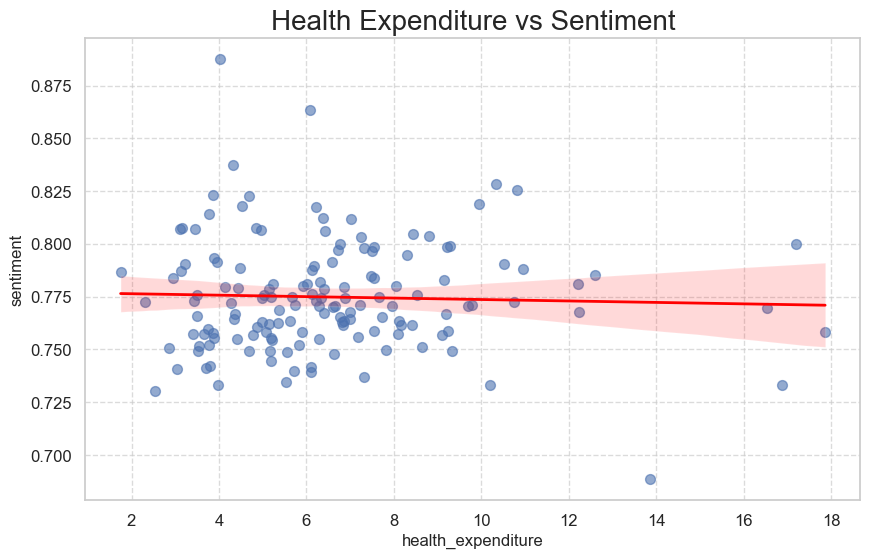

In [16]:
regression_graph('sentiment','health_expenditure',df_model_sent,'Health Expenditure vs Sentiment')

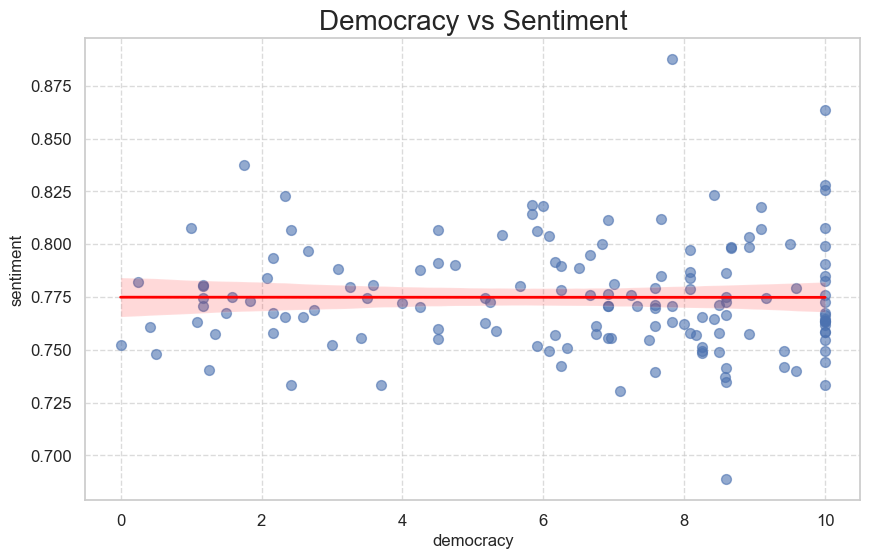

In [15]:
regression_graph('sentiment','democracy',df_model_sent,'Democracy vs Sentiment')

In [ ]:
m = ols('income ~ sentiment',df_model_sent).fit()
m.summary()

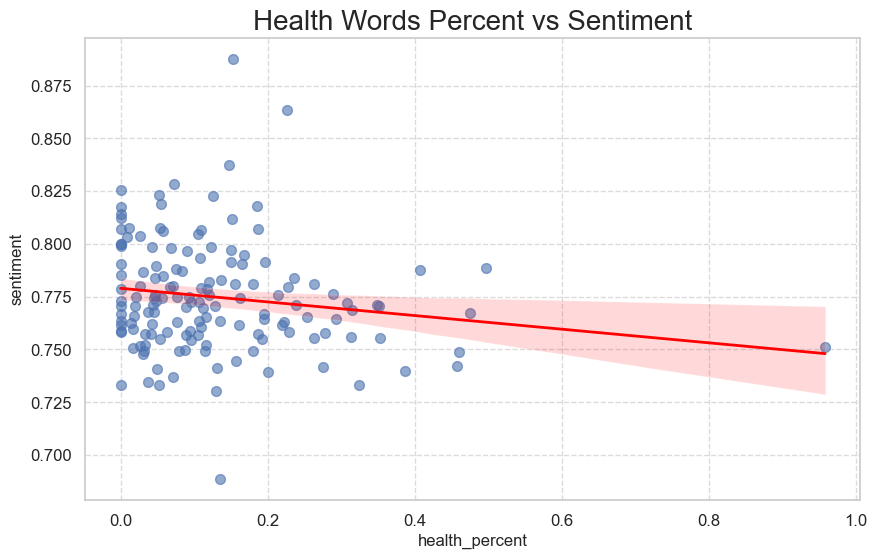

In [14]:
regression_graph('sentiment','health_percent',df_model_sent,'Health Words Percent vs Sentiment')

# Example Document Term Matrix

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

# Sample documents
documents = [
    "this is a sample document",
    "this document is another example example example",
    "and here is a different one"
]

# Create a document-term matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

print("Original DTM:")
print(df)


Original DTM:
   and  another  different  document  example  here  is  one  sample  this
0    0        0          0         1        0     0   1    0       1     1
1    0        1          0         1        3     0   1    0       0     1
2    1        0          1         0        0     1   1    1       0     0


In [47]:
# Desired words
selected_words = ['this', 'example', 'different']

# Total word counts in each document
total_word_counts = df.sum(axis=1)

# Word counts for the selected words
selected_word_counts = df[selected_words].sum(axis=1)

# Proportion of selected words
proportion_selected_words = selected_word_counts / total_word_counts

# Combine the results in a DataFrame
result_df = pd.DataFrame({
    'total_word_counts': total_word_counts,
    'selected_word_counts': selected_word_counts,
    'proportion_selected_words': proportion_selected_words
})

print("Proportion of selected words:")
print(result_df)


Proportion of selected words:
   total_word_counts  selected_word_counts  proportion_selected_words
0                  4                     1                   0.250000
1                  7                     4                   0.571429
2                  5                     1                   0.200000


In [ ]:
selected_words = ["malaria", "dengue", "diarrhoea", "diarrhea", "diarrhoeal", "diarrheal", "infection", "disease", "diseases", "virus", "sars", "measles", "pneumonia", "epidemic","epidemics","pandemic","pandemics","epidemiology","healthcare","health","mortality", "mortalities","morbidity","nutrition", "illness", "illnesses", "ncd", "ncds", "nutrition", "malnutrition", "malnourishment", "mental_disorder","mental_disorders", "stunting", "medical", "loss_life", "loss_lives","death", "deaths","killed", "wellbeing", "well-being", "hiv", "aids", "sti", "waterborne", "vectorborne", "immunization"]